In [1]:
library('outliers')
suppressWarnings(suppressMessages(library('ggpubr')))

In [2]:
data <- read.table('./uscrime.txt', header = T)

In [3]:
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [4]:
crime <- data$Crime

Wikipedia for Grubbs test states that --

<br>
Grubbs' test is based on the assumption of normality. That is, one should first verify that the data can be reasonably approximated by a normal distribution before applying the Grubbs' test.

</br>

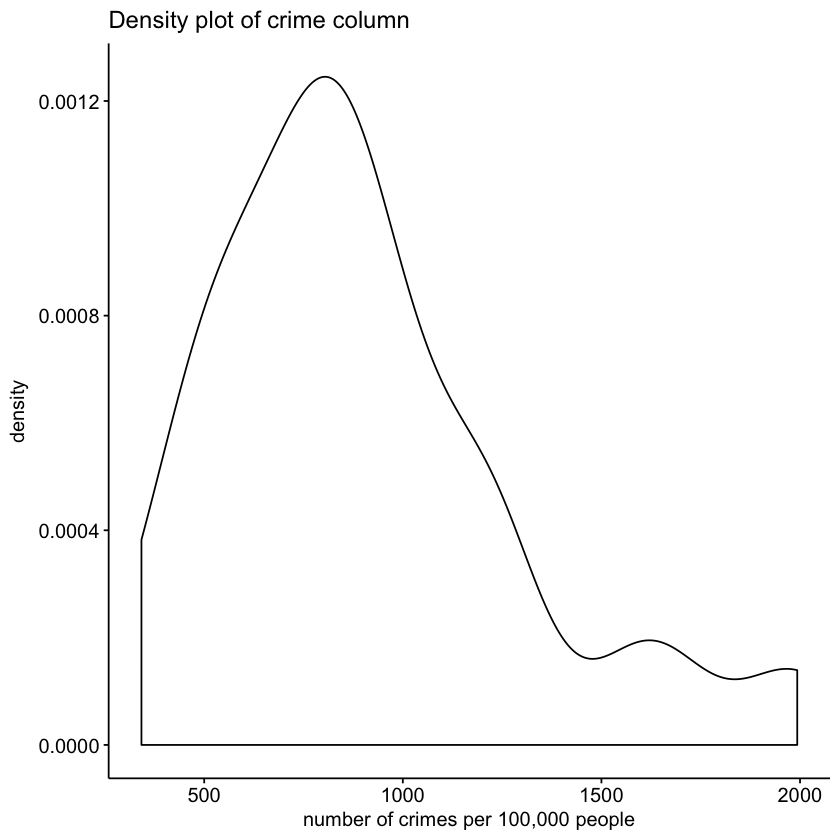

In [5]:
#so let's check for normality first.
ggdensity(crime, 
          main = "Density plot of crime column",
          xlab = "number of crimes per 100,000 people")

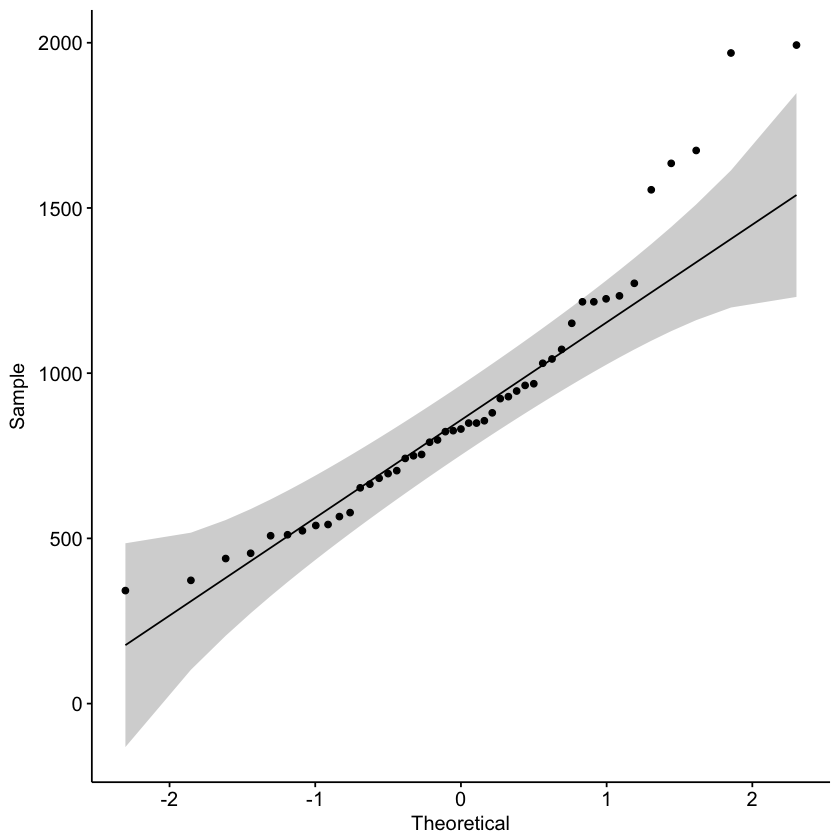

In [6]:
ggqqplot(crime)

In [7]:
shapiro.test(crime)


	Shapiro-Wilk normality test

data:  crime
W = 0.91273, p-value = 0.001882


It is evident from the density plot, qq plot and shapiro test that the data isn't normal. For shapiro test, since the p-value < 0.05 -- we can reject the null hypothesis that the data is normal. Hence, Grubbs test wouldn't hold any meaning. However, we will proceed and see what results we get.

In [8]:
grubbs.test(crime, type = 10, opposite = T)


	Grubbs test for one outlier

data:  crime
G = 1.45590, U = 0.95292, p-value = 1
alternative hypothesis: lowest value 342 is an outlier


In [9]:
grubbs.test(crime, type = 10, opposite = F)


	Grubbs test for one outlier

data:  crime
G = 2.81290, U = 0.82426, p-value = 0.07887
alternative hypothesis: highest value 1993 is an outlier


In [10]:
grubbs.test(crime, type = 10, opposite = T, two.sided = T)


	Grubbs test for one outlier

data:  crime
G = 1.45590, U = 0.95292, p-value < 2.2e-16
alternative hypothesis: lowest value 342 is an outlier


In [11]:
grubbs.test(crime, type = 11, opposite = T)


	Grubbs test for two opposite outliers

data:  crime
G = 4.26880, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


In [12]:
grubbs.test(crime, type = 11, opposite = F)


	Grubbs test for two opposite outliers

data:  crime
G = 4.26880, U = 0.78103, p-value = 1
alternative hypothesis: 342 and 1993 are outliers


In [13]:
grubbs.test(crime, type = 11, opposite = T, two.sided = T)


	Grubbs test for two opposite outliers

data:  crime
G = 4.26880, U = 0.78103, p-value < 2.2e-16
alternative hypothesis: 342 and 1993 are outliers


In [14]:
grubbs.test(crime, type = 11, opposite = F, two.sided = T)


	Grubbs test for two opposite outliers

data:  crime
G = 4.26880, U = 0.78103, p-value < 2.2e-16
alternative hypothesis: 342 and 1993 are outliers


In [15]:
#it can be seen that Grubbs test gives quite off results. And as per the last cell with type = 11, it says 342 and 1993
#are outliers.

5.1


<br>I work for a small business lender. We recently got on board brokers to refer us premium quality applicants. We could use a CUSUM approach to detect a change in FICO score of the applicant, annual revenue of the business, profitability, etc. Threshold and critical value would be decided by trial and error. Since we already know when the brokers were on boarded, we could verify that our results are not off by comparing the time a change is detected -- it should not be too far/different from the time brokers were on boarded.

Exercise 6.2

<br>

Summer ends each year around the same period i.e last week of August to first week of September. Shown by conditional formatting on the excel sheet.